In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [4]:
data = pd.read_csv('drug200.csv')

In [5]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Кодируем категориальные признаки

In [8]:
unique_values_BP = data['BP'].unique()
unique_values_Cholesterol = data['Cholesterol'].unique()
unique_values_Drug = data['Drug'].unique()

print("Уникальные значения для BP:", unique_values_BP)
print("Уникальные значения для Cholesterol:", unique_values_Cholesterol)
print("Уникальные значения для Drug:", unique_values_Drug)

Уникальные значения для BP: ['HIGH' 'LOW' 'NORMAL']
Уникальные значения для Cholesterol: ['HIGH' 'NORMAL']
Уникальные значения для Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [9]:
BP_mapping = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
Cholesterol_mapping = {'HIGH': 0, 'NORMAL': 1}
Drug_mapping = {'DrugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4}
Sex_mapping = {'F': 0, 'M': 1}

data['BP'] = data['BP'].map(BP_mapping)
data['Cholesterol'] = data['Cholesterol'].map(Cholesterol_mapping)
data['Drug'] = data['Drug'].map(Drug_mapping)
data['Sex'] = data['Sex'].map(Sex_mapping)

In [10]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop("Drug", axis=1)
y = data["Drug"]

In [13]:
print(X.head(), "\n")
print(y.head())

   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043 

0    0
1    1
2    1
3    2
4    0
Name: Drug, dtype: int64


# Разделение выборки на обучающую и тестовую

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [15]:
X_train.shape, y_train.shape,

((150, 5), (150,))

In [16]:
X_test.shape, y_test.shape

((50, 5), (50,))

In [17]:
from typing import Dict, Tuple

In [18]:
def type_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    labels, counts = np.unique(array, return_counts=True)
    counts_perc = counts/array.size
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_type_proportions(array: np.ndarray):
    proportions = type_proportions(array)
    if len(proportions)>0:
        print('Тип \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [19]:
print_type_proportions(data.Drug)

Тип 	 Количество 	 Процент встречаемости
0 	 91 	 	 45.5%
1 	 16 	 	 8.0%
2 	 54 	 	 27.0%
3 	 23 	 	 11.5%
4 	 16 	 	 8.0%


In [20]:
print_type_proportions(y_train)

Тип 	 Количество 	 Процент встречаемости
0 	 73 	 	 48.67%
1 	 11 	 	 7.33%
2 	 37 	 	 24.67%
3 	 17 	 	 11.33%
4 	 12 	 	 8.0%


In [21]:
print_type_proportions(y_test)

Тип 	 Количество 	 Процент встречаемости
0 	 18 	 	 36.0%
1 	 5 	 	 10.0%
2 	 17 	 	 34.0%
3 	 6 	 	 12.0%
4 	 4 	 	 8.0%


# Построение модели ближайших соседей для произвольного гиперпараметра

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
clf_i = KNeighborsClassifier(n_neighbors=20)
clf_i.fit(X_train, y_train)
target_i = clf_i.predict(X_test)
len(target_i), target_i

(50,
 array([0, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 4, 2, 1, 0,
        0, 0, 2, 2, 0, 0, 2, 1, 2, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
        2, 0, 0, 0, 2, 0]))

# Кросс-валидация и подбор гиперпараметра K через GridSearch и RandomizedSearch 

In [24]:
from sklearn.model_selection import cross_val_score, cross_validate

In [25]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Drug, cv=3)
scores

array([0.74626866, 0.73134328, 0.63636364])

In [26]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data, data.Drug, scoring='f1_weighted', 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00141287, 0.00110793, 0.00106978]),
 'score_time': array([0.00409603, 0.01121879, 0.00249219]),
 'test_score': array([0.7478186 , 0.73262159, 0.63757958]),
 'train_score': array([0.85450061, 0.90817923, 0.94818296])}

## Стратегия K-Fold

In [27]:
from sklearn.model_selection import KFold

In [28]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Drug, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.00291991, 0.00172377, 0.00080013, 0.00070095, 0.00124002]),
 'score_time': array([0.00552821, 0.00340724, 0.00183606, 0.00212789, 0.0021081 ]),
 'test_score': array([0.7986014 , 0.70576299, 0.81073232, 0.71100882, 0.5943956 ])}

## Стратегия Repeated K-Fold

In [29]:
from sklearn.model_selection import RepeatedKFold

In [30]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Drug, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.00342298, 0.00189304, 0.00122929, 0.00072908, 0.00088596,
        0.00106502]),
 'score_time': array([0.00696015, 0.00411177, 0.00233483, 0.00332594, 0.0022471 ,
        0.00252986]),
 'test_score': array([0.72417204, 0.70430074, 0.73388395, 0.68590332, 0.72349039,
        0.55111373])}

## Стратегия Leave One Out

In [31]:
from sklearn.model_selection import LeaveOneOut

In [32]:
kf = LeaveOneOut()
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Drug, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.00141001, 0.00141478, 0.00104499, 0.001091  , 0.00067616,
        0.00062728, 0.00063801, 0.0006032 , 0.00063109, 0.00083208,
        0.0010612 , 0.00085807, 0.00072908, 0.00079608, 0.00076485,
        0.00070405, 0.00076509, 0.00096822, 0.00099087, 0.00076509,
        0.0006299 , 0.00065088, 0.00065398, 0.00134182, 0.0007031 ,
        0.00061798, 0.0006783 , 0.00068712, 0.0007391 , 0.00092316,
        0.00088906, 0.00072384, 0.00064492, 0.00069594, 0.00081801,
        0.00064707, 0.00062895, 0.00061584, 0.00094485, 0.00068617,
        0.00071812, 0.00066471, 0.00068378, 0.00062799, 0.00082779,
        0.00224996, 0.0008719 , 0.00068521, 0.00292587, 0.00272322,
        0.00172901, 0.00179219, 0.00130987, 0.00140595, 0.00084686,
        0.00077701, 0.00090504, 0.00069022, 0.00060582, 0.0006001 ,
        0.0006721 , 0.00060511, 0.000597  , 0.00064707, 0.00060797,
        0.000844  , 0.0006609 , 0.00068617, 0.00080395, 0.0006249 ,
        0.00060487, 0.00107813, 0.00

## Стратегия ShuffleSplit

In [33]:
from sklearn.model_selection import ShuffleSplit

In [34]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Drug, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.00594568, 0.00129199, 0.00081897, 0.00096893, 0.00233126]),
 'score_time': array([0.01292014, 0.00313497, 0.00271797, 0.00243402, 0.00357389]),
 'test_score': array([0.68608435, 0.7751049 , 0.77345984, 0.74945055, 0.71395431])}

## Стратегия StratifiedKFold

In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
skf = StratifiedKFold(n_splits=3)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Drug, scoring='f1_weighted', 
                         cv=skf)
scores

{'fit_time': array([0.0023191 , 0.0015099 , 0.00333428]),
 'score_time': array([0.00689387, 0.00563097, 0.00560594]),
 'test_score': array([0.7478186 , 0.73262159, 0.63757958])}

## Оптимизация гиперпараметра

## Через GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [39]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

CPU times: user 144 ms, sys: 4.42 ms, total: 148 ms
Wall time: 163 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [40]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00122223, 0.00108118, 0.00088992, 0.00083909, 0.00088587,
        0.00064812, 0.00079174, 0.00211186, 0.00084472, 0.00085554]),
 'std_fit_time': array([5.96457999e-04, 1.44877803e-04, 2.23532217e-04, 2.54722357e-04,
        1.95982137e-04, 2.25426500e-05, 9.12938830e-05, 1.47933273e-03,
        7.56369556e-05, 1.62819579e-04]),
 'mean_score_time': array([0.0027307 , 0.00269508, 0.00142612, 0.00153589, 0.00155625,
        0.00142131, 0.00196519, 0.00309544, 0.0017602 , 0.0017837 ]),
 'std_score_time': array([1.13028761e-03, 6.57902321e-04, 4.80498562e-05, 2.87692064e-04,
        2.10511622e-04, 1.57047431e-04, 9.59816769e-04, 1.62741627e-03,
        3.45341502e-04, 4.94689644e-04]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_

In [41]:
clf_gs.best_estimator_

KNeighborsClassifier()

In [42]:
clf_gs.best_score_

0.6933333333333334

In [43]:
clf_gs.best_params_

{'n_neighbors': 5}

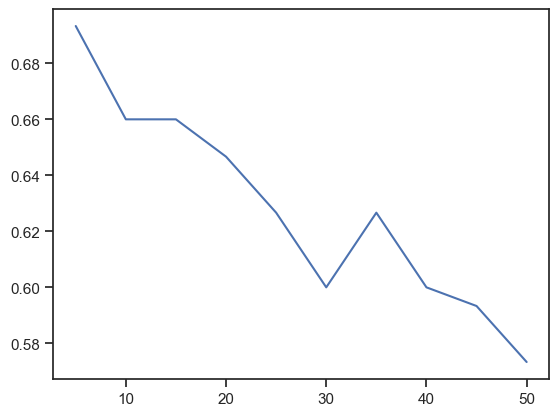

In [44]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Через RandomizedSearch

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

CPU times: user 164 ms, sys: 20.3 ms, total: 185 ms
Wall time: 261 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [47]:
clf_rs.best_score_, clf_rs.best_params_

(0.6933333333333334, {'n_neighbors': 5})

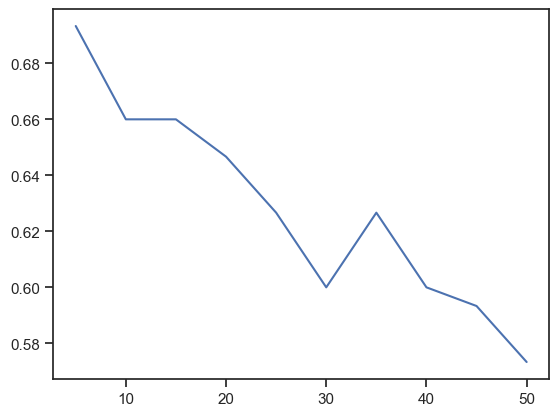

In [48]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

# Построение оптимальной модели

In [49]:
clf_o = KNeighborsClassifier(n_neighbors=5)
clf_o.fit(X_train, y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

(50,
 array([0, 4, 4, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 0, 3, 0, 2, 2, 2, 2, 2, 0,
        0, 0, 2, 2, 0, 0, 1, 2, 2, 4, 2, 0, 2, 2, 0, 2, 2, 2, 3, 0, 2, 0,
        1, 0, 0, 0, 0, 0]))

# Оценка качества исходной и оптимальной модели

In [50]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

## Метрика Accuracy

In [51]:
accuracy_score(y_test, target_i)

0.58

In [52]:
accuracy_score(y_test, target_o)

0.62

In [53]:
def accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    types = np.unique(y_true)
    res = dict()
    for t in types:
        temp_data_flt = df[df['t']==t]
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[t] = temp_acc
    return res

def print_accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_types(y_true, y_pred)
    if len(accs)>0:
        print('Тип \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [54]:
print_accuracy_score_for_types(y_test, target_i)

Тип 	 Accuracy
0 	 0.9444444444444444
1 	 0.0
2 	 0.6470588235294118
3 	 0.0
4 	 0.25


In [55]:
print_accuracy_score_for_types(y_test, target_o)

Тип 	 Accuracy
0 	 1.0
1 	 0.0
2 	 0.6470588235294118
3 	 0.3333333333333333
4 	 0.0


## Метрика balanced_accuracy_score

In [56]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    res = [1 if x==target else 0 for x in array]
    return res

In [57]:
bin_y_train = convert_target_to_binary(y_train, 2)
list(zip(y_train, bin_y_train))[:10]

[(4, 0),
 (2, 1),
 (0, 0),
 (2, 1),
 (0, 0),
 (0, 0),
 (3, 0),
 (2, 1),
 (0, 0),
 (2, 1)]

In [58]:
bin_y_test = convert_target_to_binary(y_test, 2)
list(zip(y_test, bin_y_test))[:10]

[(0, 0),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1),
 (1, 0),
 (0, 0),
 (3, 0),
 (4, 0),
 (3, 0)]

In [59]:
bin_target_i = convert_target_to_binary(target_i, 2)

In [60]:
balanced_accuracy_score(bin_y_test, bin_target_i)

0.6265597147950089

In [61]:
bin_target_o = convert_target_to_binary(target_o, 2)

In [62]:
balanced_accuracy_score(bin_y_test, bin_target_o)

0.6871657754010696

## Метрика "Матрица ошибок"

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test, target_i, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[17,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  1,  0,  0,  0],
       [ 2,  2, 11,  0,  2,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

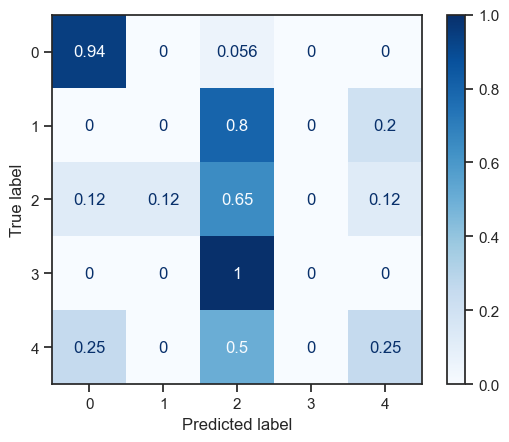

In [65]:
ConfusionMatrixDisplay.from_estimator(
        clf_i,
        X_test,
        y_test,
        display_labels=clf_i.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

In [66]:
confusion_matrix(y_test, target_o, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  1,  0,  0,  0],
       [ 2,  1, 11,  1,  2,  0,  0,  0],
       [ 0,  2,  2,  2,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

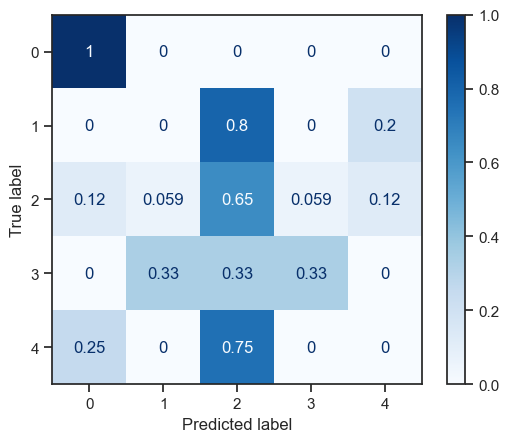

In [67]:
ConfusionMatrixDisplay.from_estimator(
        clf_o,
        X_test,
        y_test,
        display_labels=clf_o.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

## Метрика Precision

In [68]:
from sklearn.metrics import precision_score

In [69]:
precision_score(bin_y_test, bin_target_i)

0.4583333333333333

In [70]:
precision_score(bin_y_test, bin_target_o)

0.55

## Метрика Recall

In [71]:
from sklearn.metrics import recall_score

In [72]:
recall_score(bin_y_test, bin_target_i)

0.6470588235294118

In [73]:
recall_score(bin_y_test, bin_target_o)

0.6470588235294118

## Метрика F1-мера

In [74]:
from sklearn.metrics import f1_score

In [75]:
f1_score(bin_y_test, bin_target_i)

0.5365853658536586

In [76]:
f1_score(bin_y_test, bin_target_o)

0.5945945945945946

In [77]:
bin_clf_i = KNeighborsClassifier(n_neighbors=20)
bin_clf_i.fit(X_train, bin_y_train)
bin_clf_i.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [78]:
proba_target_i = bin_clf_i.predict_proba(X_test)
len(proba_target_i), proba_target_i

(50,
 array([[0.8 , 0.2 ],
        [0.65, 0.35],
        [0.65, 0.35],
        [0.65, 0.35],
        [0.7 , 0.3 ],
        [0.55, 0.45],
        [0.7 , 0.3 ],
        [0.6 , 0.4 ],
        [0.7 , 0.3 ],
        [0.65, 0.35],
        [0.7 , 0.3 ],
        [0.55, 0.45],
        [0.95, 0.05],
        [0.9 , 0.1 ],
        [0.55, 0.45],
        [0.85, 0.15],
        [0.55, 0.45],
        [0.5 , 0.5 ],
        [0.7 , 0.3 ],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.7 , 0.3 ],
        [0.7 , 0.3 ],
        [0.75, 0.25],
        [0.65, 0.35],
        [0.6 , 0.4 ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.6 , 0.4 ],
        [0.75, 0.25],
        [0.65, 0.35],
        [0.65, 0.35],
        [0.55, 0.45],
        [0.65, 0.35],
        [0.45, 0.55],
        [0.65, 0.35],
        [0.85, 0.15],
        [0.6 , 0.4 ],
        [0.65, 0.35],
        [0.55, 0.45],
        [0.65, 0.35],
        [0.8 , 0.2 ],
        [0.6 , 0.4 ],
        [0.65, 0.35],
        [0.6 , 0.4 ],
     

In [79]:
true_proba_target_i = proba_target_i[:,1]
true_proba_target_i

array([0.2 , 0.35, 0.35, 0.35, 0.3 , 0.45, 0.3 , 0.4 , 0.3 , 0.35, 0.3 ,
       0.45, 0.05, 0.1 , 0.45, 0.15, 0.45, 0.5 , 0.3 , 0.45, 0.25, 0.3 ,
       0.3 , 0.25, 0.35, 0.4 , 0.  , 0.  , 0.4 , 0.25, 0.35, 0.35, 0.45,
       0.35, 0.55, 0.35, 0.15, 0.4 , 0.35, 0.45, 0.35, 0.2 , 0.4 , 0.35,
       0.4 , 0.2 , 0.  , 0.15, 0.3 , 0.3 ])

# ROC-кривая и ROC AUC

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

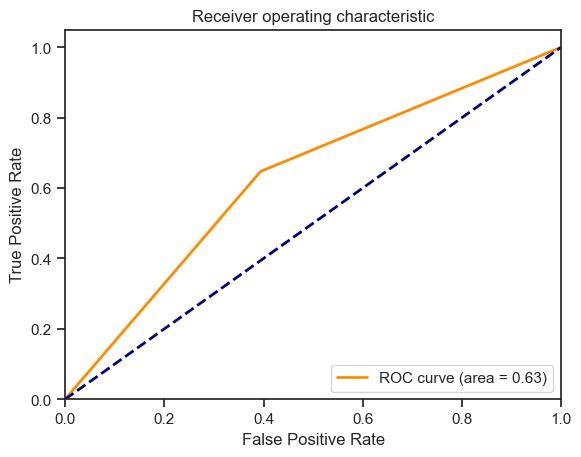

In [82]:
draw_roc_curve(bin_y_test, bin_target_i, pos_label=1, average='micro')

In [83]:
bin_clf_o = KNeighborsClassifier(n_neighbors=5)
bin_clf_o.fit(X_train, bin_y_train)
bin_clf_o.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [84]:
proba_target_o = bin_clf_o.predict_proba(X_test)
len(proba_target_o), proba_target_o

(50,
 array([[0.8, 0.2],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.6, 0.4],
        [0.8, 0.2],
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        [0.6, 0.4],
        [1. , 0. ],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.8, 0.2],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.6, 0.4],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.8, 0.2],
        [0.4, 0.6],
        [0.6, 0.4],
        [1. , 0. ],
        [0.4, 0.6],
        [0.4, 0.6],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.8, 0.2],
        [0.6, 0.4],
        [1. , 0. ],
        [0.8, 0.2],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [0.6, 0

In [85]:
true_proba_target_o = proba_target_o[:,1]
true_proba_target_o

array([0.2, 0.4, 0.4, 0.6, 0.2, 0.6, 0.4, 0.6, 0.2, 0.4, 0.2, 0.6, 0. ,
       0. , 0.4, 0. , 0.6, 0.4, 0.4, 0.6, 0.6, 0.2, 0.2, 0.4, 0.6, 0.4,
       0. , 0. , 0.2, 0.4, 0.4, 0.4, 0.4, 0.2, 0.6, 0.4, 0. , 0.6, 0.6,
       0.6, 0.4, 0.2, 0.4, 0. , 0.2, 0.2, 0. , 0. , 0.2, 0.4])

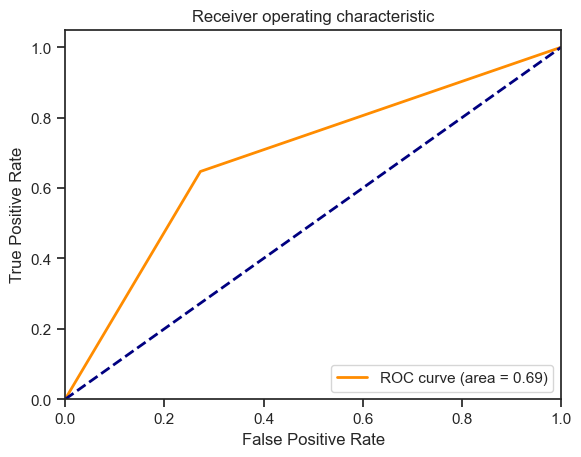

In [86]:
draw_roc_curve(bin_y_test, bin_target_o, pos_label=1, average='micro')